Эта лабораторная работа посвящена кластеризации. Мы будем работать с рукописными изображениями цифр, научимся их кластеризовать двумя разными методами (иерархическая кластеризация и алгоритм $K$-means), оценивать качество разбиения и выбирать оптимальное число кластеров, а также визуализировать промежуточные результаты.

# 1. Получение данных

Данные, с которыми мы будем работать, доступны в библиотеке scikit-learn (модуль называется `sklearn`) в подмодуле `datasets` через функцию, которая называется `load_digits`. Всего имеется 1797 наблюдений, каждое из них представляет чёрно-белую картинку 8 $\times$ 8 пикселей. Эти картинки – распознанные рукописные цифры от 0 до 9. Образцов написания каждой цифры дано приблизительно поровну, около 180.

Для удобства использования данных каждая картинка "развёрнута" в строку, так что NumPy-массив, в котором хранятся данные, имеет размерность 2 и величину 1797 $\times$ 64 (а не, например, размерность 3 и величину 1797 $\times$ 8 $\times$ 8). Интенсивность цвета в каждом пикселе кодируется целым числом от 0 до 16.

Кроме наблюдений (картинок), известны соответствующие им значения целевой переменной: какую цифру на самом деле изображает каждая картинка. Мы могли бы сразу сформулировать задачу обучения с учителем и предсказывать цифры по картинкам, но для целей этой лабораторной работы мы будем действовать по-другому: сделаем вид, что нам не известны истинные метки классов (т. е. цифры) и даже количество классов, и попробуем сгруппировать данные таким образом, чтобы качество кластеризации оказалось наилучшим, а затем посмотрим, насколько точно полученные кластеры совпадают с группами изображений одинаковых цифр.

Загрузите данные. Добейтесь, чтобы в переменной `X` оказался массив наблюдений, содержащий 1797 $\times$ 64 числа, а в переменной `y` – массив истинных меток классов, содержащий 1797 чисел.

*Указания:*
- Как загрузить данные, объяснено в справке к функции `load_digits`.
- Размер массива хранится в атрибуте `shape`.

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()

Визуализируйте первые десять картинок, расположив их на сетке 3 $\times$ 4 (в последнем ряду останутся пустые места). Добейтесь, чтобы фон картинок был белым, а изображения цифр – тёмными.

*Указания:*
- Не забудьте импортировать NumPy и Matplotlib.
- Картинки 8 $\times$ 8 можно либо достать готовыми из объекта, загруженного функцией `load_digits`, либо сделать самостоятельно из строк массива `X`. Во втором случае пользуйтесь методом `reshape`.
- Чтобы изображение не было цветным, можно вызвать функцию `plt.gray`, прежде чем начать рисовать.
- Располагать картинки на сетке умеет функция `plt.subplot`. Ознакомьтесь со справкой к ней.
- По умолчанию число 0 кодирует чёрный цвет, а число 16 – белый цвет. Подумайте, как обратить цвета одной операцией над NumPy-массивом.
- Выводить картинку на экран умеет функция `plt.imshow`. Ознакомьтесь со справкой к ней.
- Если считаете нужным, можете отключить сглаживание – параметр `interpolation` у функции `plt.imshow`.
- Если считаете нужным, можете отключить деления на координатных осях. За это отвечают функции `plt.xticks` и `plt.yticks`.

<Figure size 432x288 with 0 Axes>

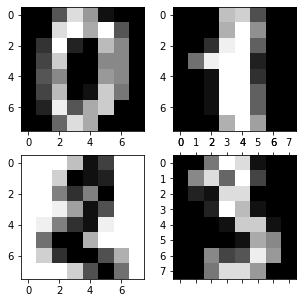

In [2]:
import matplotlib.pyplot as plt 

import numpy as np
plt.gray(); 

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(5, 5, forward=True) 
axs[0, 0].imshow(digits.images[0],cmap=plt.get_cmap('gray'));
axs[0, 1].imshow(digits.images[1]);
axs[1, 0].imshow(np.invert(np.array(digits.images[2],dtype=np.uint8)));#инвертирование цвета для примера
axs[1, 1].matshow(digits.images[3]);


plt.show();

In [3]:
#смотрим как выглядит строка для задания ниже
digits.images[2][1]

array([ 0.,  0.,  3., 16., 15., 14.,  0.,  0.])

# 2. Кластеризация и оценка качества

Мы будем использовать два популярных алгоритма: иерархическую кластеризацию и метод $K$ средних ($K$-means clustering). Эти и другие алгоритмы кластеризации доступны в библиотеке scikit-learn в подмодуле `cluster`. Иерархическая кластеризация называется `AgglomerativeClustering`, а метод $K$ средних – `KMeans`.

Интерфейс у большинства алгоритмов в scikit-learn простой и единообразный:
- Чтобы инициализировать модель, нужно создать экземпляр соответствующего класса со всеми необходимыми параметрами. Например, у кластеризаций единственный обязательный параметр называется `n_clusters`, это количество кластеров, которое мы хотим получить на выходе.
- Инициализированную модель можно обучить, вызвав метод `fit`.
- С помощью обученной модели можно предсказывать, вызывая метод `predict`.

Как видно, этот интерфейс хорош только для задач обучения с учителем, в которых чётко разделены фазы обучения модели и предсказания с её помощью. У кластеризаций зато есть метод `fit_predict`, который разбивает входную выборку на кластеры и сразу же возвращает результаты разбиения.

Используя каждый из двух методов, иерархическую кластеризацию и $K$ средних, получите разбиение массива `X` на 10 кластеров.

*Указания:*
- Оба раза должен получиться массив из 1797 чисел – номеров кластеров.
- `KMeans` делает несколько (по умолчанию 10) запусков со случайными центрами и из полученных разбиений выводит лучшее в терминах среднего внутрикластерного расстояния. Чтобы улучшить качество предсказаний, можно увеличить число запусков, например, до 100. Это параметр `n_init` в конструкторе.

In [4]:
import numpy as np
from sklearn import metrics
from time import time
n_digits = len(np.unique(digits.target))
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
data = digits.data
labels = digits.target
def evalution(estimator,name,data):
    t0 = time()
    estimator.fit(data)
    print
    print('%-20s\t%.2fs\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0),
             metrics.normalized_mutual_info_score(labels,estimator.labels_),
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.accuracy_score(labels, estimator.labels_)
             ))
    
    
evalution(KMeans(n_clusters=n_digits, n_init=100),
              name="KMeans", data=data)
    
evalution(AgglomerativeClustering(n_clusters=10),name="AgglomerativeClustering",data=data)

#классический способ
kmen=KMeans(n_clusters=n_digits, n_init=100).fit_predict(data)
agg=AgglomerativeClustering(n_clusters=10).fit_predict(data)

print('\naccuracy_score: %0.3f KMeans' % metrics.accuracy_score(labels,kmen))
print('accuracy_score: %0.3f AgglomerativeClustering' % metrics.accuracy_score(labels,agg))

KMeans              	2.62s	0.745	0.740	0.749	0.019
AgglomerativeClustering	0.16s	0.868	0.858	0.879	0.194

accuracy_score: 0.124 KMeans
accuracy_score: 0.194 AgglomerativeClustering


Визуализируйте центры кластеров, полученных каждым из двух способов. Это опять должны быть картинки на сетке 3 $\times$ 4 с белым фоном и тёмными контурами. Прокомментируйте: какой из двух алгоритмов даёт центры кластеров, больше похожие на типичные начертания цифр?

*Указания:*
- Центр кластера – это среднее по всем наблюдениям, входящим в кластер, т. е. по какому-то набору строк из `X`.
- Чтобы выбрать наблюдения, входящие в кластер номер `i`, используйте индексацию по булевозначной маске. Саму маску можно получить из массива предсказанных номеров кластеров и числа `i` оператором `==`.
- Усреднять NumPy-массив вдоль какой-нибудь из осей умеет функция `np.mean`. Ознакомьтесь со справкой к ней. Нам нужно усреднение по строкам.

KMeans визуализация


<Figure size 360x360 with 0 Axes>

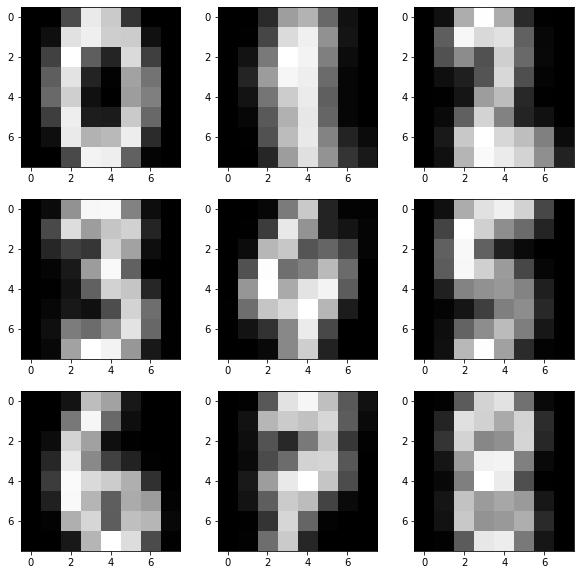

In [5]:
def showtens(data,index,text):
  import numpy as np
  import pandas as pd
  test=pd.DataFrame(data,index=index)
  plt.figure(figsize=(5, 5))
  
  cent_history=[]
  print(text)
  for i in range(10):
    cent_history.append(np.mean(test[labels == i], axis=0))

  fig, axs = plt.subplots(2, 5)
  
  fig.set_size_inches(10, 10)
  
  for i in range(0, 9):
	  plt.subplot(330 + 1 + i)
    
	  plt.imshow(np.array(cent_history[i]).reshape(8,8), cmap=plt.get_cmap('gray')) 
  
  plt.show();
showtens(data,kmen,'KMeans визуализация')

AgglomerativeClustering


<Figure size 360x360 with 0 Axes>

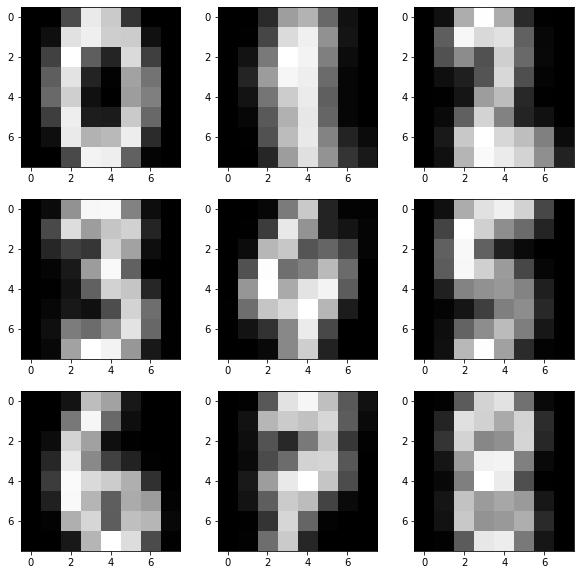

In [6]:
showtens(data,agg,'AgglomerativeClustering')

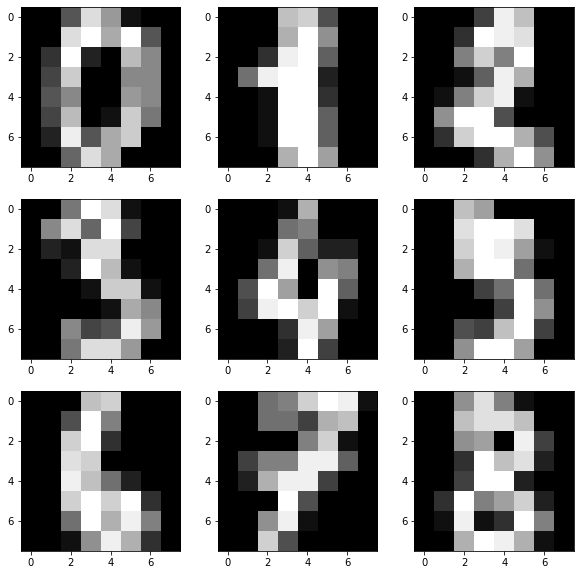

In [7]:
#для примера тут выведены картинки без обработки, то есть так как они выглядят. 
fig, axs = plt.subplots(2, 5)
fig.set_size_inches(10, 10) 
for i in range(0, 9):
	plt.subplot(330 + 1 + i)
	plt.imshow(np.array(data[i]).reshape(8,8), cmap=plt.get_cmap('gray'))

plt.show()

В ситуации, когда истинное число кластеров неизвестно, подбирают оптимальное число кластеров. При этом учитывают две величины: внутрикластерное расстояние (чем меньше, тем лучше) и межкластерное расстояние (чем больше, тем лучше). Так как две эти величины не достигают оптимума одновременно, обычно оптимизируют какой-нибудь функционал от них. Один популярный функционал называется "силуэт" (silhouette). Вот как он вычисляется.

Пусть $X$ – множество наблюдений, $M \subset X$ – один из кластеров, на которые оно разбито в результате кластеризации, $\rho$ – метрика на $X$. Выберем какое-нибудь одно наблюдение $x \in M$. Обозначим $a(x)$ среднее расстояние от $x$ до точек $x'$ из того же кластера:
$$
a(x) = \frac{1}{|M|} \sum_{x' \in M} \rho(x,\, x')
$$

Обозначим $b(x)$ минимум средних расстояний от $x$ до точек $x''$ из какого-нибудь другого кластера $N$:
$$
b(x) = \min_{N \ne M} \frac{1}{|N|} \sum_{x'' \in N} \rho(x,\, x'')
$$

Силуэт – это разность межкластерного и внутрикластерного расстояний, нормированная до отрезка $[-1,\, 1]$ и усреднённая по всем наблюдениям:
$$
\frac{1}{|X|} \sum_{x \in X} \frac{b(x) - a(x)}{\max(a(x),\, b(x))}
$$

В scikit-learn силуэт считается функцией `silhouette_score` из подмодуля `metrics`. На вход нужно передать массив наблюдений и результат кластеризации.


Для числа $K$ от 2 до 20 включительно получите разбиение массива `X` на $K$ кластеров каждым из двух методов. Посчитайте силуэт. Посчитанные значения силуэта сохраните в переменную и визуализируйте в виде графика в координатах: число $K$ – значение силуэта. При каком числе кластеров достигается максимум силуэта?

*Указания:*
- Не забудьте, что функция `range` не захватывает правый конец диапазона.
- Под значения силуэта можно завести два списка: один для иерархической кластеризации, другой для $K$ средних.
- Рисовать графики умеет функция `plt.plot`. Ознакомьтесь со справкой к ней.
- На одной картинке можно разместить несколько графиков, это просто несколько последовательных вызовов `plt.plot`.
- Чтобы добавить легенду (подписи к графикам), можно воспользоваться функцией `plt.legend`. Местоположение легенды контролируется параметром `loc`.
- Чтобы подписать координатные оси, можно воспользоваться функциями `plt.xlabel` и `plt.ylabel`.

In [0]:
k=[]
a=[]

In [0]:

from sklearn.metrics import silhouette_score
for i in range(2,21):
    kmen=KMeans(n_clusters=i, n_init=100).fit_predict(data)
    k.append(silhouette_score(data, kmen))
    agg=AgglomerativeClustering(n_clusters=i).fit_predict(data)
    a.append(silhouette_score(data, agg))


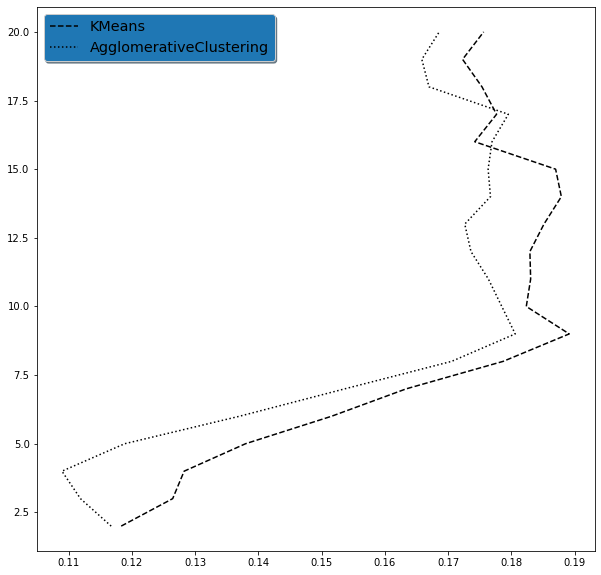

In [10]:
c=range(2,21)
fig, ax = plt.subplots()
fig.set_size_inches(10, 10, forward=True) 
ax.plot(k, c, 'k--', label='KMeans')
ax.plot(a, c, 'k:', label='AgglomerativeClustering')


legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

legend.get_frame().set_facecolor('C0')

plt.show()


Когда известно "правильное" (в каком-нибудь смысле) разбиение на кластеры, результат кластеризации можно сравнить с ним, используя такие меры, как однородность (homogeneity), полнота (completeness) и их среднее гармоническое – $V$-мера. Определения этих величин довольно громоздкие и основаны на понятии [энтропии распределения вероятностей](https://ru.wikipedia.org/wiki/Информационная_энтропия); подробности излагаются в [этой статье](http://aclweb.org/anthology/D/D07/D07-1043.pdf). На практике достаточно знать, что однородность, полнота и $V$-мера заключены между нулём и единицей – чем больше, тем лучше.

Так как мы знаем, какую цифру на самом деле изображает каждая картинка (это массив `y`), мы можем использовать однородность, полноту и $V$-меру для оценки качества кластеризации. Функции для вычисления этих величин доступны в scikit-learn, в подмодуле `metrics`, под названиями `homogeneity_score`, `completeness_score`, `v_measure_score`. Как вариант, можно использовать функцию `homogeneity_completeness_v_measure`, которая возвращает сразу тройку чисел.

Повторите предыдущее задание, используя $V$-меру вместо силуэта. При каком числе кластеров достигается максимум $V$-меры?

In [0]:
#конечно не очень красиво... 
ah,av,ac=[],[],[]
kh,kv,kc=[],[],[]
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score
for i in range(2,22):
    kmen=KMeans(n_clusters=i, n_init=100).fit_predict(data)
    h,c,v=homogeneity_completeness_v_measure(labels, kmen)
    kh.append(h)
    kv.append(v)
    kc.append(c)
    agg=AgglomerativeClustering(n_clusters=i).fit_predict(data)
    h,c,v=homogeneity_completeness_v_measure(labels, agg)
    ah.append(h)
    av.append(v)
    ac.append(c)

    
    



In [12]:
len(ah)

20

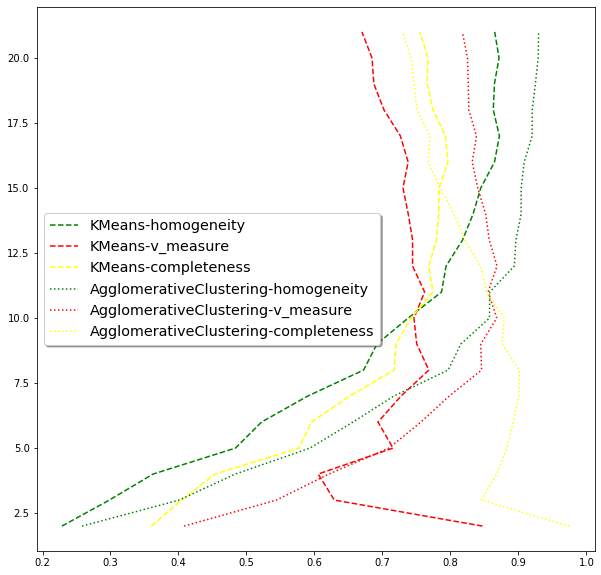

In [13]:
#строим графики
c=range(2,22)
fig, ax = plt.subplots()
fig.set_size_inches(10, 10, forward=True) 
ax.plot(kh, c, 'k--', label='KMeans-homogeneity',color='green')
ax.plot(kc, c, 'k--', label='KMeans-v_measure',color='red')
ax.plot(kv, c, 'k--', label='KMeans-completeness',color='yellow')
ax.plot(ah, c, 'k:', label='AgglomerativeClustering-homogeneity',color='green')
ax.plot(av, c, 'k:', label='AgglomerativeClustering-v_measure',color='red')
ax.plot(ac, c, 'k:', label='AgglomerativeClustering-completeness',color='yellow')

legend = ax.legend(loc='best', shadow=True, fontsize='x-large')



plt.show()

# 3. Снижение размерности признакового пространства

Иногда, особенно когда признаков много и не все они одинаково информативные, бывает полезно снизить размерность признакового пространства, то есть вместо $d$ исходных признаков перейти к рассмотрению $d' \ll d$ новых признаков. Данные были представлены матрицей $n$ наблюдений $\times$ $d$ исходных признаков, а теперь будут представлены матрицей $n$ наблюдений $\times$ $d'$ новых признаков.

Есть два популярных подхода к снижению размерности:
- отобрать (select) новые признаки из числа имеющихся;
- извлечь (extract) новые признаки, преобразуя старые, например, сделать $d'$ различных линейных комбинаций столбцов исходной матрицы $n \times d$.

Одним из широко используемых методов извлечения признаков является сингулярное разложение матрицы (singular value decomposition, SVD). Этот метод позволяет сконструировать любое число $d' \le d$ новых признаков таким образом, что они будут, в определённом смысле, максимально информативными. Математические детали сейчас не важны; познакомиться с ними можно, например, [здесь](https://www.coursera.org/learn/mathematics-and-python/lecture/L9bCV/razlozhieniia-matrits-v-proizviedieniie-singhuliarnoie-razlozhieniie)
(по-русски) или [здесь](https://www.youtube.com/watch?v=P5mlg91as1c) (по-английски).

В scikit-learn есть несколько реализаций сингулярного разложения. Мы будем использовать класс `TruncatedSVD` из подмодуля `decomposition`. В конструктор этого класса достаточно передать один параметр `n_components` – желаемое число новых признаков. Метод `fit_transform` принимает матрицу и возвращает новую матрицу с таким же количеством строк, как прежде, и количеством столбцов, равным числу новых признаков.

*<u>Замечание:</u>* Сингулярное разложение матрицы $M$ обычно пишут в виде $M = U \Sigma V^{*}$, где $U$, $\Sigma$ и $V$ – некие матрицы с хорошими свойствами. То, что возвращает алгоритм `TruncatedSVD`, – это сколько-то (сколько мы хотим получить) первых столбцов матрицы $U$.

Выполните сингулярное разложение матрицы `X`, оставляя 2, 5, 10, 20 признаков. В каждом случае выполните иерархическую и $K$-means кластеризацию преобразованных данных (число кластеров примите равным 10). Посчитайте значения силуэта и $V$-меры. Удалось ли при каком-нибудь $d'$ получить силуэт и / или $V$-меру лучше, чем на исходных данных?

In [0]:
from sklearn.metrics import v_measure_score
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import homogeneity_completeness_v_measure

s=[2,5,10,20]
sil=[]
vmer=[]
for i in s:
  tpca=TruncatedSVD(n_components = i)
  PCAreduced = tpca.fit_transform(data)
  kmen=KMeans(n_clusters=n_digits, n_init=100).fit_predict(PCAreduced)
  sil.append(silhouette_score(PCAreduced, kmen))
  
  h,c,v=homogeneity_completeness_v_measure(labels, kmen)
  vmer.append(v)


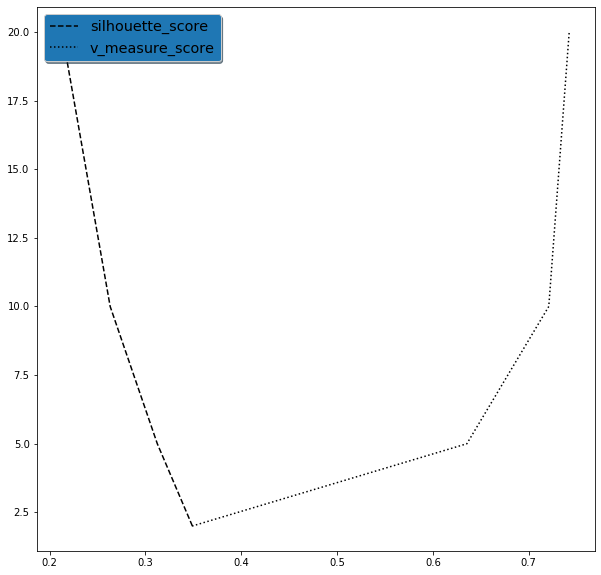

In [15]:

fig, ax = plt.subplots()
fig.set_size_inches(10, 10, forward=True) 
ax.plot(sil, s, 'k--', label='silhouette_score')
ax.plot(vmer, s, 'k:', label='v_measure_score')


legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

legend.get_frame().set_facecolor('C0')

plt.show()

Другая популярная техника снижения размерности, которая особенно хорошо подходит для работы с картинками, – это алгоритм t-distributed stochastic neighbor embeddings, сокращённо tSNE. В отличие от сингулярного разложения, это преобразование нелинейное. Его основная идея – отобразить точки из пространства размерности $d$ в пространство размерности 2 или 3 (обычно 2, то есть на плоскость) таким образом, чтобы как можно точнее сохранить расстояния. Математические детали есть, например, [здесь](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding), но они нетривиальны.

В библиотеке scikit-learn реализацией tSNE является класс `TSNE` в подмодуле `manifold`. В конструктор можно передать параметр `n_components`, а можно и не передавать: по умолчанию он равен 2. Метод `fit_transform` работает аналогично тому, как и у `TruncatedSVD`.


Выполните tSNE-преобразование матрицы `X`, оставив 2 признака. Визуализируйте данные, преобразованные таким образом, в виде точечной диаграммы: первый признак вдоль горизонтальной оси, второй признак вдоль вертикальной оси. Подсветите разными цветами группы точек, соответствующих разным цифрам.

*Указания:*
- Точечную диаграмму умеет рисовать функция `plt.scatter`. Ознакомьтесь со справкой к ней.
- За цвета точек отвечает параметр `c` у функции `plt.scatter`. Передать в него надо истинные метки классов.

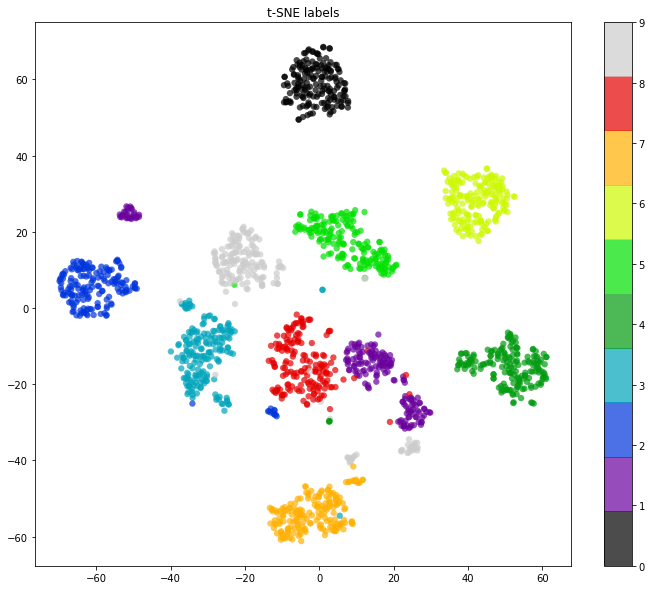

In [16]:
#мы просто визуализируем все это дело с точками из labels (настоящими а не предсказанными)
from sklearn.manifold import TSNE

tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(data)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('t-SNE labels');

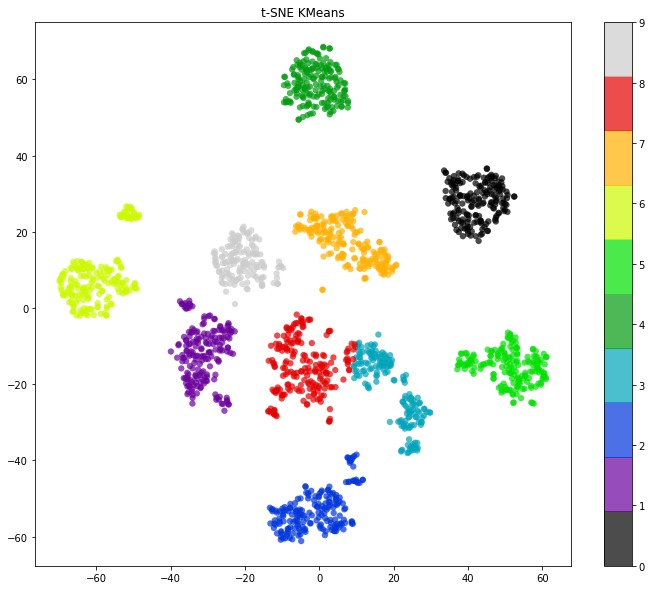

In [17]:
#И так - мы берем предсказание которые были нам даны в kmen и визуализируем иго. 
from sklearn.manifold import TSNE

tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(data)
kmen=KMeans(n_clusters=n_digits, n_init=100).fit_predict(X_tsne)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmen, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('t-SNE KMeans');

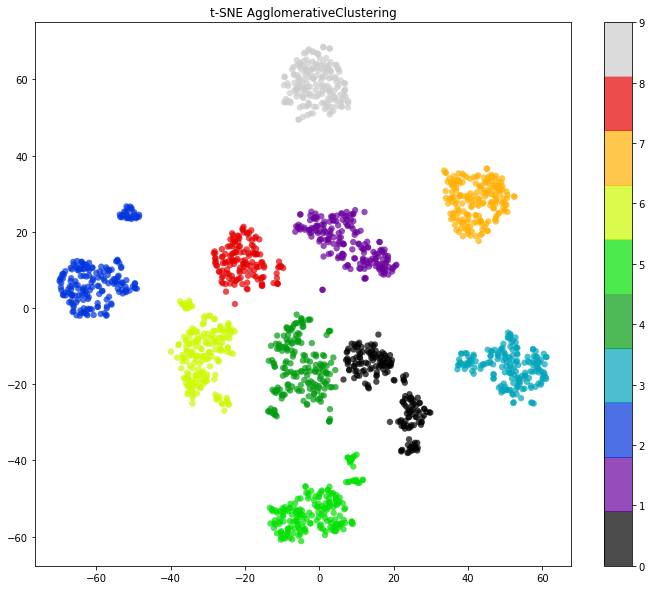

In [18]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(data)
agg=AgglomerativeClustering(n_clusters=10).fit_predict(X_tsne)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=agg, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('t-SNE AgglomerativeClustering');

Для tSNE-преобразованных данных с 2 признаками выполните иерархическую и $K$-means кластеризацию (число кластеров примите равным 10). Посчитайте значения силуэта и $V$-меры. Удалось ли получить силуэт и / или $V$-меру лучше, чем на исходных данных?

In [19]:
#И так - мы берем предсказание которые были нам даны в kmen и визуализируем иго. (если я правильно понял)
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(data)
kmen=KMeans(n_clusters=n_digits, n_init=1000).fit_predict(X_tsne)
agg=AgglomerativeClustering(n_clusters=10).fit_predict(X_tsne)

print('silhouette_score + data + kmean ', silhouette_score(data, kmen))
print('silhouette_score + t-sne + agg', silhouette_score(data, agg))
print('silhouette_score + t-sne + kmean', silhouette_score(X_tsne, kmen))
print('silhouette_score + t-sne + agg', silhouette_score(X_tsne, agg))
print('v_measure_score + t-sne + kmean', v_measure_score(labels, kmen))
print('v_measure_score + t-sne + agg', v_measure_score(labels, agg))



silhouette_score + data + kmean  0.1630488386472372
silhouette_score + t-sne + agg 0.1636696068132657
silhouette_score + t-sne + kmean 0.64234823
silhouette_score + t-sne + agg 0.64393586
v_measure_score + t-sne + kmean 0.9103193201089419
v_measure_score + t-sne + agg 0.9216282833976895


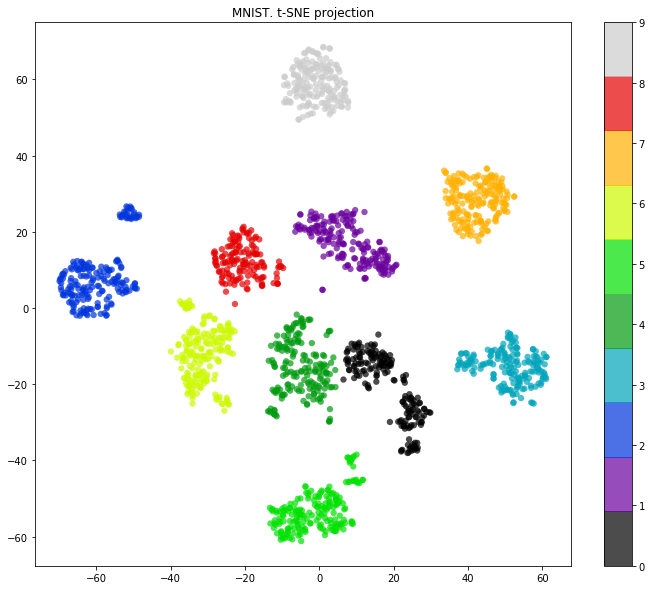

In [20]:
plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=agg, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection');



Для самого лучшего разбиения, которое вам удалось получить (на ваше усмотрение, лучшего в терминах силуэта или $V$-меры), опять визуализируйте картинками центры кластеров. Удалось ли добиться, чтобы каждый кластер соответствовал какой-нибудь одной цифре?

AgglomerativeClustering


<Figure size 360x360 with 0 Axes>

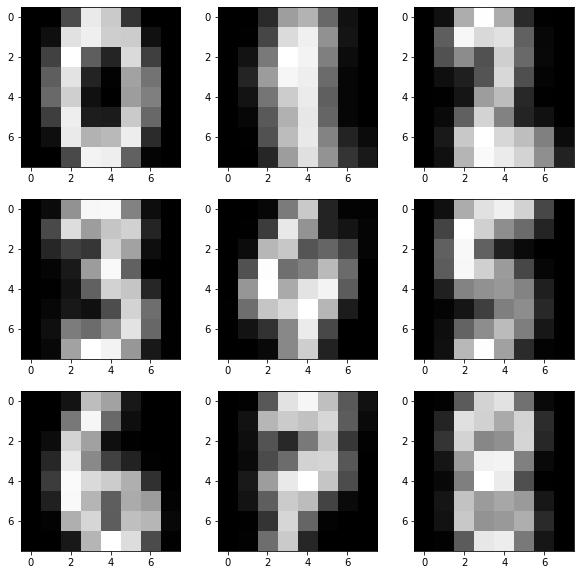

In [21]:
showtens(data,agg,'AgglomerativeClustering')




# 4. Итоги

Напишите в свободной форме, какие выводы вы сделали из выполненной работы. Ответьте, как минимум, на следующие два вопроса:
- Какой из двух методов даёт более осмысленные кластеры – иерархическая кластеризация или алгоритм $K$ средних? Зависит ли это от настроек каждого алгоритма? От критериев оценивания качества?
- Удаётся ли улучшить качество кластеризации, снижая размерность признакового пространства?

1) Предположительно AgglomerativeClustering дает лучшее представление чем метод K средних, хотя в целом данные методы дают схожую картинку. Если n= числу элементов то в целом картинка одинаковая. 
2) Да удаеться. Имееться незначительное улушчение показателей при использльзовании не ленейных методов снижения размерности.

Скачайте датасет [MNIST Handwritten Digits](http://yann.lecun.com/exdb/mnist). Как сделать это с помощью scikit-learn, написано [здесь](http://scikit-learn.org/stable/datasets/index.html#downloading-datasets-from-the-mldata-org-repository). MNIST Handwritten Digits – это 70 тысяч распознанных рукописных изображений цифр, каждое размером 28 $\times$ 28 пикселей. Попробуйте прокластеризовать этот датасет и добиться как можно лучших значений силуэта и $V$-меры.

In [22]:
from tensorflow.keras.datasets import mnist
(X_train, y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [23]:
#И так мы имеем 60.000 картинок (изображений) 
X_train.shape

(60000, 28, 28)

In [0]:
X_train=X_train[0:200]
y_train=y_train[0:200]

In [25]:
X_train.shape
y_train.shape

(200,)

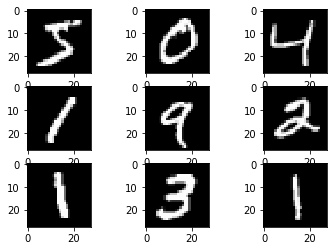

In [26]:
#смотрим на картинки.
for i in range(0, 9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

In [0]:
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans



tsne = TSNE(random_state=17)
nsamples, nx, ny = X_train.shape


d2_train_dataset = X_train.reshape((nsamples,nx*ny))
X_tsne = tsne.fit_transform(d2_train_dataset)
kmen=KMeans(n_clusters=10, n_init=100).fit_predict(X_tsne)
agg=AgglomerativeClustering(n_clusters=10).fit_predict(X_tsne)



In [28]:
from sklearn.metrics import v_measure_score,silhouette_score

print('v_measure_score + t-sne + kmean', v_measure_score(y_train, kmen))
print('v_measure_score + t-sne + agg', v_measure_score(y_train, agg))
print('silhouette_score + t-sne + kmean', silhouette_score(X_tsne, kmen))
print('silhouette_score + t-sne + agg', silhouette_score(X_tsne, agg))


v_measure_score + t-sne + kmean 0.606020290015482
v_measure_score + t-sne + agg 0.6038846103820388
silhouette_score + t-sne + kmean 0.4326049
silhouette_score + t-sne + agg 0.3923339


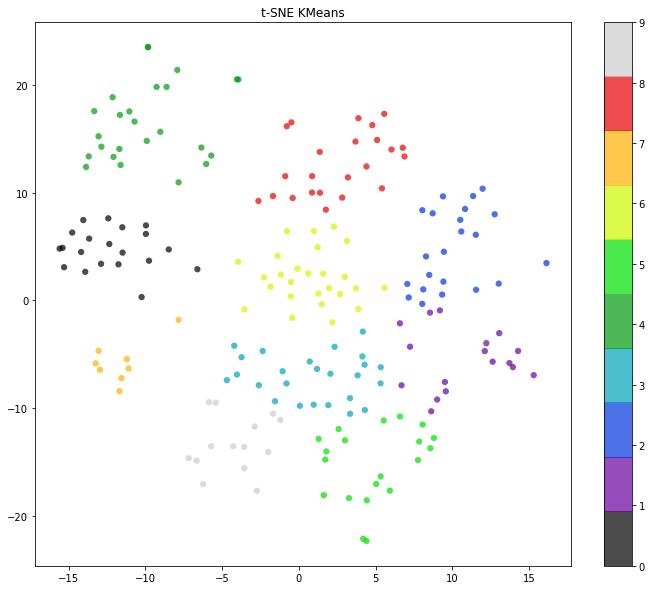

In [29]:
plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmen, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('t-SNE KMeans');


In [0]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as ll
from tensorflow.keras.utils import to_categorical

In [31]:
model = Sequential(name="mlp")

model.add(ll.Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(ll.Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(ll.BatchNormalization(momentum=0.5))
model.add(ll.Activation("relu"))
model.add(ll.MaxPool2D(pool_size=(2,2)))

model.add(ll.Dropout(0.3))


model.add(ll.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(ll.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(ll.BatchNormalization(momentum=0.5))
model.add(ll.Activation("relu"))
model.add(ll.MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(ll.Dropout(0.3))

from tensorflow.keras.optimizers import Adam
model.add(ll.Activation("tanh"))
model.add(ll.Flatten())
model.add(ll.Dense(256, activation = "relu"))
model.add(ll.Dropout(0.5))
model.add(ll.Dense(10, activation = "softmax"))

from tensorflow.keras.optimizers import Adam

optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer, "sparse_categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


---

In [0]:
from sklearn.metrics import v_measure_score,silhouette_score

(X_train, y_train),(X_test,y_test) = mnist.load_data()
X_train=X_train/255.0
X_test=X_test/255.0
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)


nsamples, nx, ny, nz = X_test.shape

d2_train_dataset = X_test.reshape((nsamples,nx*ny))


In [33]:

batch_size = 64

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks_list = [
       ModelCheckpoint(
        filepath='my_model-1.h5',
        monitor='val_loss',
        save_best_only=True,)
]


model.fit(X_train, y_train,
          validation_data=(X_test,y_test), epochs=50,callbacks=callbacks_list,batch_size = batch_size);

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 27s 448us/sample - loss: 0.2176 - acc: 0.9322 - val_loss: 0.0477 - val_acc: 0.9857
Epoch 2/50
60000/60000 [==============================] - 19s 318us/sample - loss: 0.0798 - acc: 0.9764 - val_loss: 0.0390 - val_acc: 0.9879
Epoch 3/50
60000/60000 [==============================] - 19s 322us/sample - loss: 0.0607 - acc: 0.9819 - val_loss: 0.0332 - val_acc: 0.9900
Epoch 4/50
60000/60000 [==============================] - 20s 328us/sample - loss: 0.0549 - acc: 0.9838 - val_loss: 0.0214 - val_acc: 0.9935
Epoch 5/50
60000/60000 [==============================] - 19s 323us/sample - loss: 0.0476 - acc: 0.9859 - val_loss: 0.0357 - val_acc: 0.9896
Epoch 6/50
60000/60000 [==============================] - 19s 321us/sample - loss: 0.0437 - acc: 0.9867 - val_loss: 0.0233 - val_acc: 0.9928
Epoch 7/50
60000/60000 [==============================] - 19s 321us/sample - loss: 0.0384 - acc: 0.9883 

In [34]:
new_model = tf.keras.models.load_model('my_model-1.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [35]:
#evaluate the model
test_loss, test_acc = new_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 141us/sample - loss: 0.0197 - acc: 0.9947
Test accuracy: 0.9947


In [36]:
!pip install freeze

  Created wheel for freeze: filename=freeze-1.0.10-cp36-cp36m-linux_x86_64.whl size=613631 sha256=96b438f21823a93925d63172563b4eb55df409400aa81f5d09777c10aaca9f11
  Stored in directory: /root/.cache/pip/wheels/5a/01/6b/b8d944e726b251e0f68a8786a3d26193c16f2883ae6f19c71a
Successfully built freeze


In [0]:
!pip freeze > requirements.txt

In [38]:
y=new_model.predict_classes(X_test)
print('silhouette_score', silhouette_score(d2_train_dataset, y))

print('v_measure_score ', v_measure_score(y_test, y))


silhouette_score 0.049233431249055264
v_measure_score  0.9833239457832662


П.С. Нейронная сеть не в лучшем виде так как экспериментировал. 
Исходя из полученных данных можно сделать вывод что изображение в большинстве своем является слабо структурированным объектом, который сложно разделить на части методами типа k-средних и т д. Для работы (классификации) объектов большой размерности лучше использовать нейронные сети. 


---

In [0]:
#pred=sum(models.predict(X_test) for models in (i for i in a))